In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [2]:
# đọc dữ liệu
df = pd.read_csv("OnlineRetail.csv", encoding = "ISO-8859-1")

# in ra kich thuoc du lieu
df.shape

(137839, 8)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137839 entries, 0 to 137838
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    137839 non-null  object 
 1   StockCode    137839 non-null  object 
 2   Description  137408 non-null  object 
 3   Quantity     137838 non-null  float64
 4   InvoiceDate  137838 non-null  object 
 5   UnitPrice    137838 non-null  float64
 6   CustomerID   94102 non-null   float64
 7   Country      137838 non-null  object 
dtypes: float64(3), object(5)
memory usage: 8.4+ MB


In [5]:
# kiểm tra dữ liệu bị khuyết
df.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
137834,False,False,False,False,False,False,True,False
137835,False,False,False,False,False,False,True,False
137836,False,False,False,False,False,False,True,False
137837,False,False,False,False,False,False,True,False


In [6]:
# kiểm tra dữ liệu không bị khuyết
df['CustomerID'].notna()

,CustomerID
0,True
1,True
2,True
3,True
4,True
...,...
137834,False
137835,False
137836,False
137837,False


In [7]:
# in những dòng ngoại lai Quantity < 0
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1.0,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12.0,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
137185,548098,21283,NaN,-15.0,3/29/2011 12:17,0.00,NaN,United Kingdom
137186,548104,84854,NaN,-3.0,3/29/2011 12:18,0.00,NaN,United Kingdom
137187,548110,21911,NaN,-27.0,3/29/2011 12:20,0.00,NaN,United Kingdom
137240,548149,72821,NaN,-2.0,3/29/2011 12:36,0.00,NaN,United Kingdom


In [8]:
#Xóa bỏ dòng ngoại lai của Quantity
df = df[df['Quantity'] >= 0]

In [9]:
# xóa những dòng chứa giá trị bị khuyết
df1 = df.dropna()

In [10]:
df1.shape

(91788, 8)

In [11]:
# xóa những dòng chứa toàn giá trị khuyết
df2 = df.dropna(how='all')

In [12]:
df2.shape

(135050, 8)

In [13]:
# giữ những dòng có ít nhất 7 giá trị không bị khuyết
df3 = df.dropna(thresh=7)

In [14]:
df3.shape

(134874, 8)

In [15]:
# xóa những hàng mà có giá trị bị khuyết trên cột CustomerID
df4 = df.dropna(subset=["CustomerID"])

In [16]:
df4.shape

(91788, 8)

In [17]:
# thay thế những giá trị bị khuyết trên cột CustomerID bằng giá trị -1
df5 = df
df5['CustomerID'] = df['CustomerID'].fillna(-1)

In [18]:
# hiển thị những dòng có CustomerID = -1 vừa được thay thế
df5[df5['CustomerID'] == -1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56.0,12/1/2010 11:52,0.00,-1.0,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1.0,12/1/2010 14:32,2.51,-1.0,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2.0,12/1/2010 14:32,2.51,-1.0,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4.0,12/1/2010 14:32,0.85,-1.0,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2.0,12/1/2010 14:32,1.66,-1.0,United Kingdom
...,...,...,...,...,...,...,...,...
137833,548168,22966,GINGERBREAD MAN COOKIE CUTTER,1.0,3/29/2011 13:46,2.46,-1.0,United Kingdom
137834,548168,47566b,TEA TIME PARTY BUNTING,2.0,3/29/2011 13:46,8.29,-1.0,United Kingdom
137835,548168,82551,LAUNDRY 15C METAL SIGN,1.0,3/29/2011 13:46,2.46,-1.0,United Kingdom
137836,548168,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1.0,3/29/2011 13:46,7.46,-1.0,United Kingdom


In [19]:
# thay thế các giá trị bị khuyết ở cột Country bằng giá trị trước nó
df5['Country'] = df['Country'].fillna(method='ffill')

<ipython-input-19-aa01b36ef9ae>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df5['Country'] = df['Country'].fillna(method='ffill')


In [20]:
df5

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
137833,548168,22966,GINGERBREAD MAN COOKIE CUTTER,1.0,3/29/2011 13:46,2.46,-1.0,United Kingdom
137834,548168,47566b,TEA TIME PARTY BUNTING,2.0,3/29/2011 13:46,8.29,-1.0,United Kingdom
137835,548168,82551,LAUNDRY 15C METAL SIGN,1.0,3/29/2011 13:46,2.46,-1.0,United Kingdom
137836,548168,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1.0,3/29/2011 13:46,7.46,-1.0,United Kingdom


<Axes: xlabel='Quantity'>

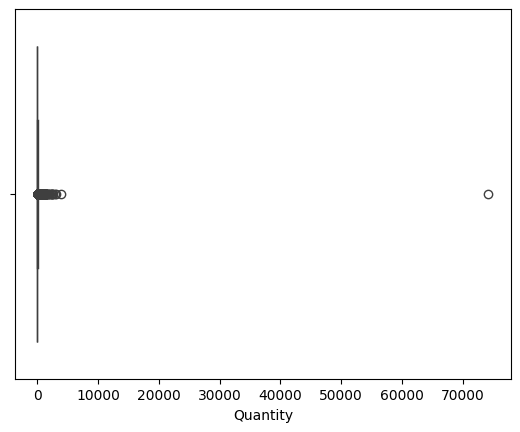

In [21]:
sns.boxplot(x=df1['Quantity'])  # vẽ box plot cho dữ liệu ở cột Quantity

In [22]:
Q1 = df1['Quantity'].quantile(0.25)
Q3 = df1['Quantity'].quantile(0.75)
IQR = Q3 - Q1

In [23]:
# xác định phần tử không phải ngoại lai
df6 = df1
df6['outlier'] = ~((df1['Quantity'] < (Q1 - 1.5*IQR)) | (df1['Quantity'] > (Q3 + 1.5*IQR)))

<ipython-input-23-4ce7ab690450>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['outlier'] = ~((df1['Quantity'] < (Q1 - 1.5*IQR)) | (df1['Quantity'] > (Q3 + 1.5*IQR)))


In [24]:
# xóa phần tử ngoại lai
df6 = df6[df6['outlier'] == True]

<Axes: xlabel='Quantity'>

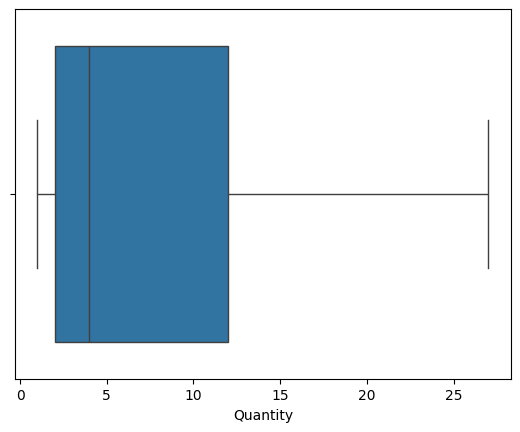

In [25]:
sns.boxplot(x=df6['Quantity'])  # vẽ box plot cho dữ liệu ở cột Quantity

<Axes: xlabel='Quantity'>

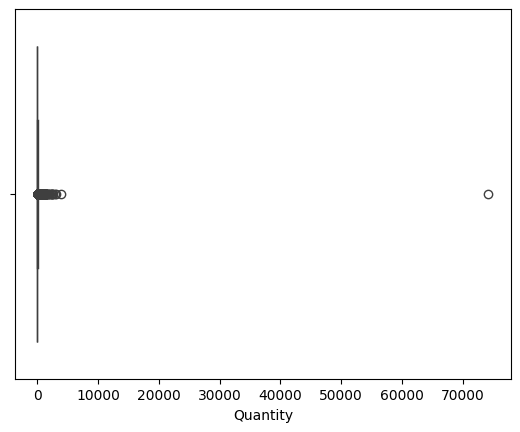

In [26]:
# vẽ biểu đồ hộp cho cột Quantity
sns.boxplot(x=df1['Quantity'])

In [27]:
# mô tả dữ liệu
df1['Quantity'].describe()

,Quantity
count,91788.000000
mean,13.453807
std,249.355817
min,1.000000
25%,2.000000
50%,5.000000
75%,12.000000
max,74215.000000


In [28]:
# chuẩn hóa dữ liệu với minmax scaling
scaler = MinMaxScaler()

# Chuẩn hóa dữ liệu trong df với MinMaxScaler ở 2 cột Quantity và UnitPrice
df_s = scaler.fit_transform(df1[['Quantity']])

In [29]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,91788.000000
mean,0.000168
std,0.003360
min,0.000000
25%,0.000013
50%,0.000054
75%,0.000148
max,1.000000


<Axes: >

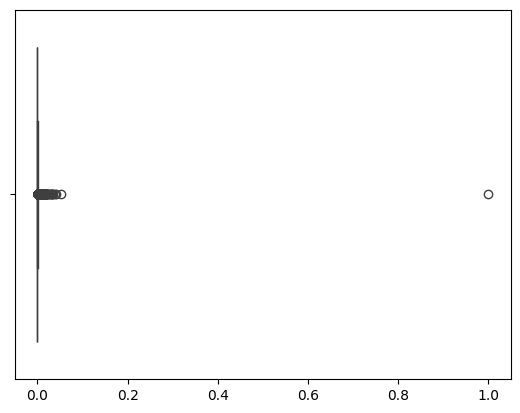

In [31]:
# vẽ lại biểu đồ hộp
#sns.boxplot(x=df_s)
sns.boxplot(x=df_s.flatten())

In [32]:
# chuẩn hóa dữ liệu với robust scaling
scaler = RobustScaler()

# Chuẩn hóa dữ liệu trong df với RobustScaler ở 2 cột Quantity và UnitPrice
df_s = scaler.fit_transform(df1[['Quantity']])

In [33]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,91788.000000
mean,0.845381
std,24.935582
min,-0.400000
25%,-0.300000
50%,0.000000
75%,0.700000
max,7421.000000


<Axes: >

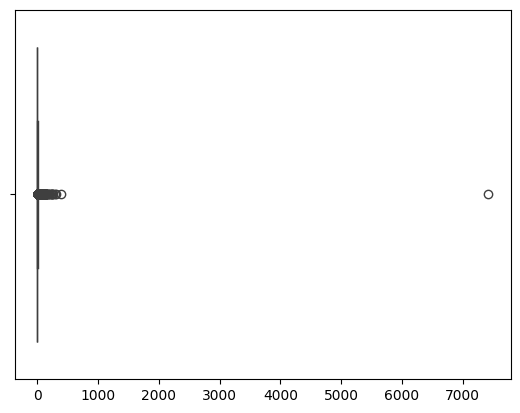

In [34]:
# vẽ lại biểu đồ hộp
sns.boxplot(x=df_s.flatten())

In [35]:
# chuẩn hóa dữ liệu với z-score scaling
scaler = StandardScaler()

# Chuẩn hóa dữ liệu trong df với StandardScaler ở 2 cột Quantity và UnitPrice
df_s = scaler.fit_transform(df1[['Quantity']])

In [36]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,9.178800e+04
mean,-1.935282e-18
std,1.000005e+00
min,-4.994419e-02
25%,-4.593384e-02
50%,-3.390277e-02
75%,-5.830281e-03
max,2.975746e+02


<Axes: >

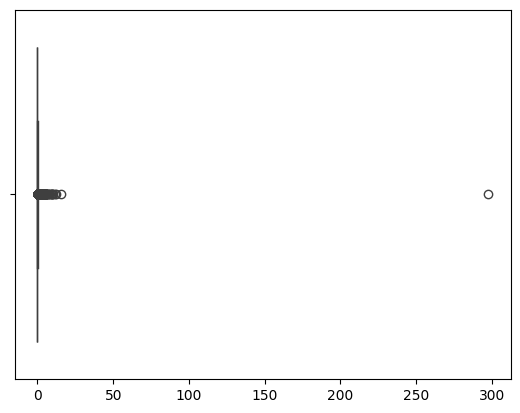

In [38]:
sns.boxplot(x=df_s.flatten())

<Axes: ylabel='Density'>

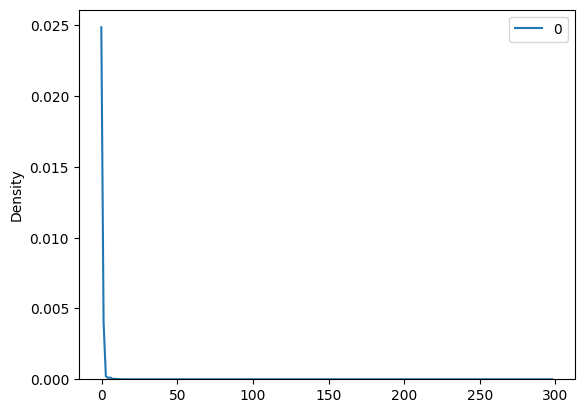

In [39]:
sns.kdeplot(data=df_s)

In [40]:
# các giá trị ở cột Country
df1['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada'], dtype=object)

In [41]:
# mã hóa cột Country với One-hot encoder sử dụng scikit learn
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(np.asarray(df1['Country']).reshape(-1,1))
encoded_data.todense()

matrix([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]])

In [42]:
# mã hóa cột Country với One-hot encoder sử dụng pandas
pd.get_dummies(df1['Country'])

,Australia,Austria,Belgium,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,EIRE,Finland,...,Norway,Poland,Portugal,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,United Arab Emirates,United Kingdom
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137445,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
137446,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
137447,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
137448,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [43]:
# mã hóa cột Country với Label encoder sử dụng scikit learn
encoder = LabelEncoder()

encoded_data = encoder.fit_transform(np.asarray(df1['Country']))
encoded_data

array([29, 29, 29, ..., 29, 29, 29])

In [44]:
# mã hóa cột Country với Label encoder sử dụng pandas
df1['Country'].astype('category').cat.codes

,0
0,29
1,29
2,29
3,29
4,29
...,...
137445,29
137446,29
137447,29
137448,29


In [45]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,outlier
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,True
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,True


In [46]:
# Rời rạc hóa dữ liệu ở cột UnitPrice

# chia thành 4 khoảng giá trị có độ dài bằng nhau
cats = pd.cut(df1['UnitPrice'], 4)
cats

,UnitPrice
0,"(-1.687, 421.792]"
1,"(-1.687, 421.792]"
2,"(-1.687, 421.792]"
3,"(-1.687, 421.792]"
4,"(-1.687, 421.792]"
...,...
137445,"(-1.687, 421.792]"
137446,"(-1.687, 421.792]"
137447,"(-1.687, 421.792]"
137448,"(-1.687, 421.792]"


In [47]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

<ipython-input-47-c6ee4ea7d746>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(cats)


,count
UnitPrice,
"(-1.687, 421.792]",91786
"(1265.378, 1687.17]",2
"(421.792, 843.585]",0
"(843.585, 1265.378]",0


In [48]:
# chia thành 4 phần có số lượng phần tử tương đương nhau
cats = pd.qcut(df1['UnitPrice'], 4)
cats

,UnitPrice
0,"(1.95, 3.75]"
1,"(1.95, 3.75]"
2,"(1.95, 3.75]"
3,"(1.95, 3.75]"
4,"(1.95, 3.75]"
...,...
137445,"(1.95, 3.75]"
137446,"(1.25, 1.95]"
137447,"(3.75, 1687.17]"
137448,"(-0.001, 1.25]"


In [49]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

<ipython-input-49-c6ee4ea7d746>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(cats)


,count
UnitPrice,
"(-0.001, 1.25]",30977
"(1.95, 3.75]",23561
"(3.75, 1687.17]",20523
"(1.25, 1.95]",16727
